# LOAN PREDICTION MODEL

In [77]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [78]:
df = pd.read_csv("train.csv")
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [79]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1995,Male,No,0,Not Graduate,No,6216,0.0,133.0,360.0,1.0,Rural,N
1996,Male,No,0,Graduate,No,2500,0.0,96.0,480.0,1.0,Semiurban,N
1997,Male,No,0,Graduate,No,5124,0.0,124.0,NaN,0.0,Rural,N
1998,Male,Yes,3+,Graduate,No,5167,3167.0,200.0,360.0,1.0,Semiurban,Y
1999,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [80]:
df.shape #Size of dataSet

(2000, 12)

In [81]:
df.info() #There are 5 numeric data parameters rest all are Catagorical parameters 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             1957 non-null   object 
 1   Married            1989 non-null   object 
 2   Dependents         1944 non-null   object 
 3   Education          2000 non-null   object 
 4   Self_Employed      1899 non-null   object 
 5   ApplicantIncome    2000 non-null   int64  
 6   CoapplicantIncome  2000 non-null   float64
 7   LoanAmount         1931 non-null   float64
 8   Loan_Amount_Term   1956 non-null   float64
 9   Credit_History     1838 non-null   float64
 10  Property_Area      2000 non-null   object 
 11  Loan_Status        2000 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 187.6+ KB


In [82]:
# for understanding the data before data-preprocessing

In [83]:
df.isnull().sum() # Total null values in each coloum

Gender                43
Married               11
Dependents            56
Education              0
Self_Employed        101
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            69
Loan_Amount_Term      44
Credit_History       162
Property_Area          0
Loan_Status            0
dtype: int64

In [84]:
df.describe()   #by default interger column

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,2000.000000,2000.000000,1931.000000,1956.000000,1838.000000
mean,5517.867500,1581.965780,147.152771,342.392638,0.845484
std,6316.379396,2712.188972,86.767637,65.342828,0.361541
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2887.250000,0.000000,100.000000,360.000000,1.000000
50%,3854.000000,1126.000000,128.000000,360.000000,1.000000
75%,5819.000000,2287.750000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [85]:
df['ApplicantIncome']

0        5849
1        4583
2        3000
3        2583
4        6000
        ...  
1995     6216
1996     2500
1997     5124
1998     5167
1999    12841
Name: ApplicantIncome, Length: 2000, dtype: int64

In [86]:
df[['ApplicantIncome', 'LoanAmount']]

,ApplicantIncome,LoanAmount
0,5849,NaN
1,4583,128.0
2,3000,66.0
3,2583,120.0
4,6000,141.0
...,...,...
1995,6216,133.0
1996,2500,96.0
1997,5124,124.0
1998,5167,200.0


In [87]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [88]:
df.isnull().sum()

Gender                43
Married               11
Dependents            56
Education              0
Self_Employed        101
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            69
Loan_Amount_Term      44
Credit_History       162
Property_Area          0
Loan_Status            0
dtype: int64

## Data Preprocessing

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             1957 non-null   object 
 1   Married            1989 non-null   object 
 2   Dependents         1944 non-null   object 
 3   Education          2000 non-null   object 
 4   Self_Employed      1899 non-null   object 
 5   ApplicantIncome    2000 non-null   int64  
 6   CoapplicantIncome  2000 non-null   float64
 7   LoanAmount         1931 non-null   float64
 8   Loan_Amount_Term   1956 non-null   float64
 9   Credit_History     1838 non-null   float64
 10  Property_Area      2000 non-null   object 
 11  Loan_Status        2000 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 187.6+ KB


In [90]:
# handle numerical missing data
# Handling numerical data by filling mean of each parameter in missing data
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [91]:
df.isnull().sum()

Gender                43
Married               11
Dependents            56
Education              0
Self_Employed        101
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
dtype: int64

In [92]:
# handle categorical missing data
df['Gender'].mode()[0]

'Male'

In [93]:
#Handling Categorical data by filling mode of each parameter in missing data
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [94]:
df.isnull().sum() #Dataset no null values now. 

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory data anlysis

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

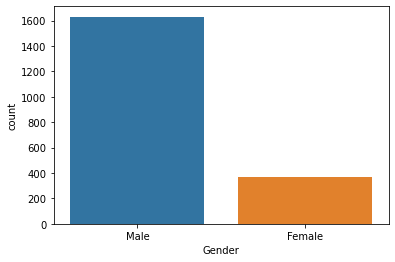

In [95]:
# categorical data
import seaborn as sns
sns.countplot(df['Gender'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

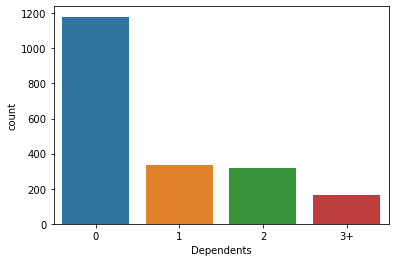

In [96]:
sns.countplot(df.Dependents)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

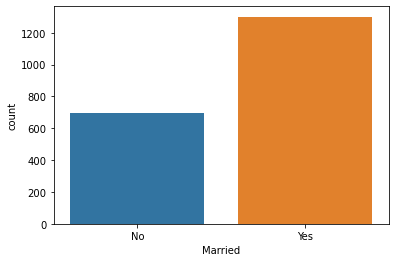

In [97]:
sns.countplot(df.Married)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

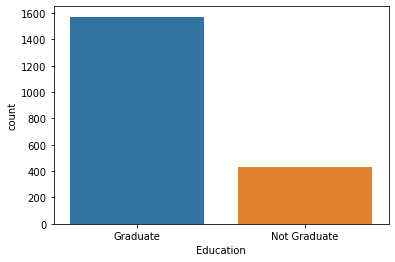

In [98]:
sns.countplot(df.Education)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

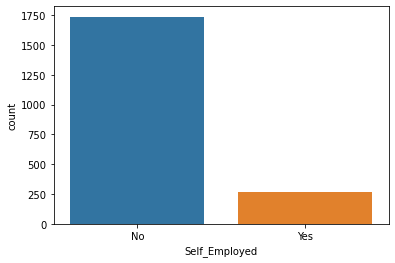

In [99]:
sns.countplot(df.Self_Employed)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

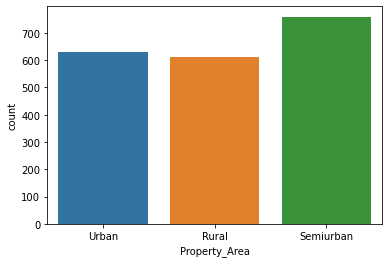

In [100]:
sns.countplot(df.Property_Area)

In [101]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Text(0.5, 1.0, 'Dependents')

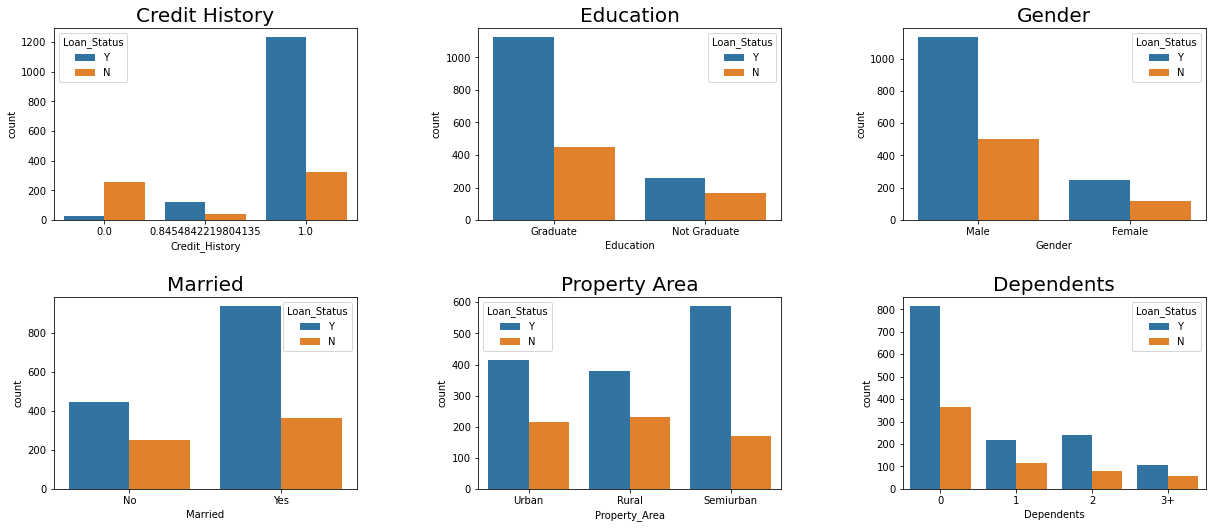

In [102]:
fig, axes = plt.subplots(2, 3, figsize=(20,8))

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

axes[0,0].set_title('Credit History', fontsize=20)
sns.countplot(ax=axes[0,0], data=df, x='Credit_History', hue='Loan_Status')

sns.countplot(ax=axes[0,1], data=df, x='Education', hue='Loan_Status')
axes[0,1].set_title("Education", fontsize=20)

sns.countplot(ax=axes[0,2], data=df, x='Gender',hue='Loan_Status')
axes[0,2].set_title("Gender", fontsize=20)



sns.countplot(ax=axes[1,0], data=df, x='Married',hue='Loan_Status')
axes[1,0].set_title("Married", fontsize=20)


sns.countplot(ax=axes[1,1], data=df, x='Property_Area', hue='Loan_Status')
axes[1,1].set_title("Property Area", fontsize=20)

sns.countplot(ax=axes[1,2], data=df, x='Dependents', hue='Loan_Status')
axes[1,2].set_title("Dependents", fontsize=20)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

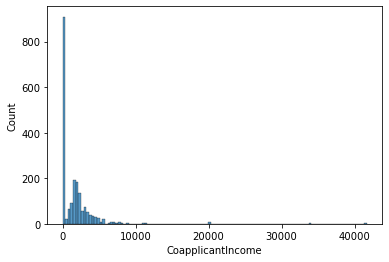

In [103]:
# numerical data
sns.histplot(df.CoapplicantIncome)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

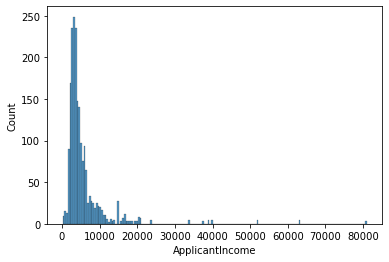

In [104]:
sns.histplot(df.ApplicantIncome)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

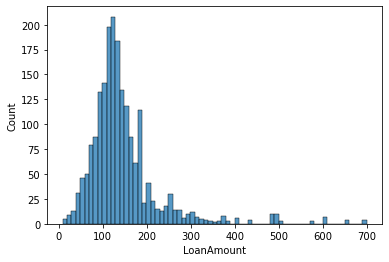

In [105]:
sns.histplot(df.LoanAmount)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

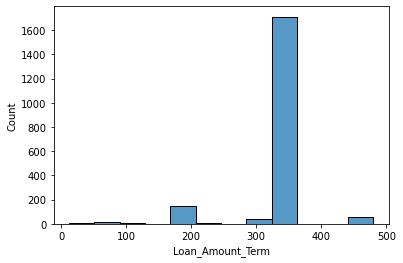

In [106]:
sns.histplot(df.Loan_Amount_Term)

<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

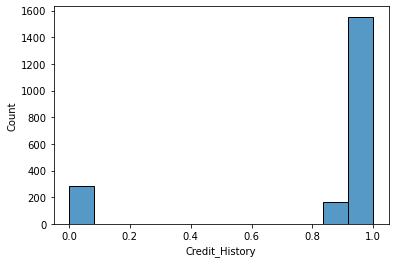

In [107]:
sns.histplot(df.Credit_History)

In [108]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,147.152771,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [109]:
# Total Income

In [110]:
df['Total_income'] = df['ApplicantIncome']+df['CoapplicantIncome']

<AxesSubplot:xlabel='Total_income', ylabel='Count'>

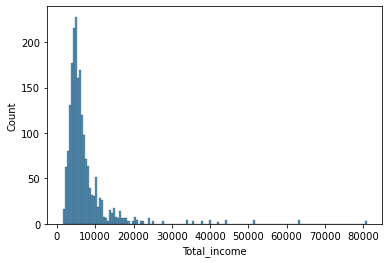

In [111]:
sns.histplot(df.Total_income)

In [112]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,Male,No,0,Graduate,No,5849,0.0,147.152771,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


## Data Transformation

### Handling Numerical Data

In [113]:
#Taking log values of the numerical data to 

In [114]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Count'>

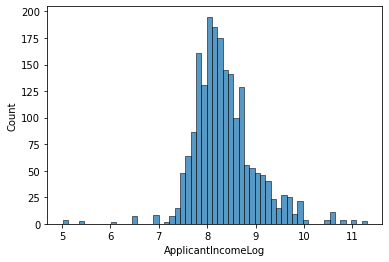

In [115]:
sns.histplot(df.ApplicantIncomeLog)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Count'>

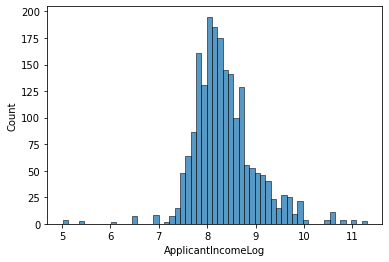

In [116]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
sns.histplot(df["ApplicantIncomeLog"])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Count'>

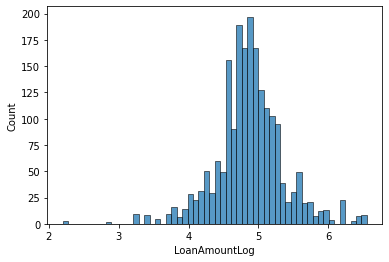

In [117]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.histplot(df["LoanAmountLog"])

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Count'>

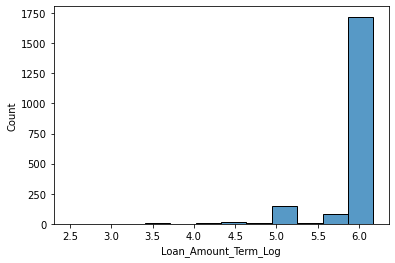

In [118]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.histplot(df["Loan_Amount_Term_Log"])

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Count'>

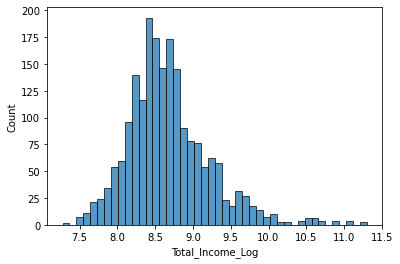

In [119]:
df['Total_Income_Log'] = np.log(df['Total_income'])
sns.histplot(df["Total_Income_Log"])

In [120]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,5849,0.0,147.152771,360.0,1.0,Urban,Y,5849.0,8.674026,-inf,4.991471,5.886104,8.674026
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,-inf,4.948760,5.886104,8.699515


In [121]:
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_income", 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1) 
#Droping of not necessary columns as we are using log values of these columns
#Droping coapplicantIncomelog because it is having -infinite values

In [122]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.991471,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


In [123]:
df.Loan_Status.value_counts()

Y    1383
N     617
Name: Loan_Status, dtype: int64

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                2000 non-null   object 
 1   Married               2000 non-null   object 
 2   Dependents            2000 non-null   object 
 3   Education             2000 non-null   object 
 4   Self_Employed         2000 non-null   object 
 5   Credit_History        2000 non-null   float64
 6   Property_Area         2000 non-null   object 
 7   Loan_Status           2000 non-null   object 
 8   ApplicantIncomeLog    2000 non-null   float64
 9   LoanAmountLog         2000 non-null   float64
 10  Loan_Amount_Term_Log  2000 non-null   float64
 11  Total_Income_Log      2000 non-null   float64
dtypes: float64(5), object(7)
memory usage: 187.6+ KB


In [125]:
df.Education.value_counts()

Graduate        1572
Not Graduate     428
Name: Education, dtype: int64

### Handling Categorical Data

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                2000 non-null   object 
 1   Married               2000 non-null   object 
 2   Dependents            2000 non-null   object 
 3   Education             2000 non-null   object 
 4   Self_Employed         2000 non-null   object 
 5   Credit_History        2000 non-null   float64
 6   Property_Area         2000 non-null   object 
 7   Loan_Status           2000 non-null   object 
 8   ApplicantIncomeLog    2000 non-null   float64
 9   LoanAmountLog         2000 non-null   float64
 10  Loan_Amount_Term_Log  2000 non-null   float64
 11  Total_Income_Log      2000 non-null   float64
dtypes: float64(5), object(7)
memory usage: 187.6+ KB


In [127]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.991471,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


In [128]:
#converting categorical data into dummy variables
d1 = pd.get_dummies(df['Gender'], drop_first= True)
d2 = pd.get_dummies(df['Married'], drop_first= True)
d3 = pd.get_dummies(df['Dependents'], drop_first= True)
d4 = pd.get_dummies(df['Education'], drop_first= True)
d5 = pd.get_dummies(df['Self_Employed'], drop_first= True)
d6 = pd.get_dummies(df['Property_Area'], drop_first= True)

df1 = pd.concat([df, d1, d2, d3, d4, d5, d6], axis = 1)
df=df1

cols = ['Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area']
df = df.drop(columns=cols, axis=1)

In [129]:
df.head()

,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,Y,8.674026,4.991471,5.886104,8.674026,1,0,0,0,0,0,0,0,1
1,1.0,N,8.430109,4.852030,5.886104,8.714568,1,1,1,0,0,0,0,0,0
2,1.0,Y,8.006368,4.189655,5.886104,8.006368,1,1,0,0,0,0,1,0,1
3,1.0,Y,7.856707,4.787492,5.886104,8.505323,1,1,0,0,0,1,0,0,1
4,1.0,Y,8.699515,4.948760,5.886104,8.699515,1,0,0,0,0,0,0,0,1


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Credit_History        2000 non-null   float64
 1   Loan_Status           2000 non-null   object 
 2   ApplicantIncomeLog    2000 non-null   float64
 3   LoanAmountLog         2000 non-null   float64
 4   Loan_Amount_Term_Log  2000 non-null   float64
 5   Total_Income_Log      2000 non-null   float64
 6   Male                  2000 non-null   uint8  
 7   Yes                   2000 non-null   uint8  
 8   1                     2000 non-null   uint8  
 9   2                     2000 non-null   uint8  
 10  3+                    2000 non-null   uint8  
 11  Not Graduate          2000 non-null   uint8  
 12  Yes                   2000 non-null   uint8  
 13  Semiurban             2000 non-null   uint8  
 14  Urban                 2000 non-null   uint8  
dtypes: float64(5), object

In [131]:
df.describe()

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.845484,8.354282,4.866987,5.803320,8.676521,0.815500,0.650500,0.167000,0.160000,0.083000,0.214000,0.132000,0.379500,0.315500
std,0.346582,0.652849,0.493677,0.310928,0.549801,0.387988,0.476931,0.373069,0.366698,0.275951,0.410229,0.338575,0.485384,0.464831
min,0.000000,5.010635,2.197225,2.484907,7.273786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.968059,4.615121,5.886104,8.340695,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8.256866,4.867534,5.886104,8.599326,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,8.668884,5.105945,5.886104,8.929336,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,11.302204,6.551080,6.173786,11.302204,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Test Datasets

In [132]:
test = pd.read_csv("test.csv")

## Data-Preprocessing
# filling numerical missing data
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mean())

# filling categorical missing data
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])
test['Married']=test['Married'].fillna(test['Married'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

test['Total_income'] = test['ApplicantIncome']+test['CoapplicantIncome']

## Data Transformation
# apply log transformation to the numeric attribute
test['ApplicantIncomeLog'] = np.log(test['ApplicantIncome'])

test['CoapplicantIncomeLog'] = np.log(test['CoapplicantIncome'])

test['LoanAmountLog'] = np.log(test['LoanAmount'])

test['Loan_Amount_Term_Log'] = np.log(test['Loan_Amount_Term'])

test['Total_Income_Log'] = np.log(test['Total_income'])

cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_income", 'Loan_ID', 'CoapplicantIncomeLog']
test = test.drop(columns=cols, axis=1)

# Converting Categorical attributes in dummy variables
t1 = pd.get_dummies(test['Gender'], drop_first= True)
t2 = pd.get_dummies(test['Married'], drop_first= True)
t3 = pd.get_dummies(test['Dependents'], drop_first= True)
t4 = pd.get_dummies(test['Education'], drop_first= True)
t5 = pd.get_dummies(test['Self_Employed'], drop_first= True)
t6 = pd.get_dummies(test['Property_Area'], drop_first= True)

df1 = pd.concat([test, t1, t2, t3, t4, t5, t6], axis = 1)
test=df1

cols = ['Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area']
test = test.drop(columns=cols, axis=1)


C:\Users\hp\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [133]:
test.head()

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.000000,8.651724,4.700480,5.886104,8.651724,1,1,0,0,0,0,0,0,1
1,1.000000,8.031385,4.836282,5.886104,8.428581,1,1,1,0,0,0,0,0,1
2,1.000000,8.517193,5.337538,5.886104,8.824678,1,1,0,1,0,0,0,0,1
3,0.825444,7.757906,4.605170,5.886104,8.494129,1,1,0,1,0,0,0,0,1
4,1.000000,8.094378,4.356709,5.886104,8.094378,1,0,0,0,0,1,0,0,1


In [134]:
df.head()

,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,Y,8.674026,4.991471,5.886104,8.674026,1,0,0,0,0,0,0,0,1
1,1.0,N,8.430109,4.852030,5.886104,8.714568,1,1,1,0,0,0,0,0,0
2,1.0,Y,8.006368,4.189655,5.886104,8.006368,1,1,0,0,0,0,1,0,1
3,1.0,Y,7.856707,4.787492,5.886104,8.505323,1,1,0,0,0,1,0,0,1
4,1.0,Y,8.699515,4.948760,5.886104,8.699515,1,0,0,0,0,0,0,0,1


In [135]:
# specify input and output attributes
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [136]:
x

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,8.674026,4.991471,5.886104,8.674026,1,0,0,0,0,0,0,0,1
1,1.0,8.430109,4.852030,5.886104,8.714568,1,1,1,0,0,0,0,0,0
2,1.0,8.006368,4.189655,5.886104,8.006368,1,1,0,0,0,0,1,0,1
3,1.0,7.856707,4.787492,5.886104,8.505323,1,1,0,0,0,1,0,0,1
4,1.0,8.699515,4.948760,5.886104,8.699515,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.0,8.734882,4.890349,5.886104,8.734882,1,0,0,0,0,1,0,0,0
1996,1.0,7.824046,4.564348,6.173786,7.824046,1,0,0,0,0,0,0,1,0
1997,0.0,8.541691,4.820282,5.835958,8.541691,1,0,0,0,0,0,0,0,0
1998,1.0,8.550048,5.298317,5.886104,9.028099,1,1,0,0,1,0,0,1,0


In [137]:
y

0       Y
1       N
2       Y
3       Y
4       Y
       ..
1995    N
1996    N
1997    N
1998    Y
1999    N
Name: Loan_Status, Length: 2000, dtype: object

In [138]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [139]:
x_train.head()

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
1738,0.0,8.242756,5.375278,5.886104,8.909235,1,1,0,1,0,0,0,0,1
548,0.0,8.517193,4.634729,5.886104,8.517193,0,0,0,0,0,0,0,1,0
936,1.0,8.670601,4.927254,5.886104,8.670601,1,1,0,0,0,0,0,0,0
1389,1.0,7.919356,4.744932,5.886104,8.432071,1,1,1,0,0,0,0,1,0
1607,1.0,9.756321,5.416100,5.886104,9.756321,0,0,0,0,0,1,1,1,0


In [140]:
y_test.head()

1860    Y
353     N
1333    Y
905     Y
1289    Y
Name: Loan_Status, dtype: object

## Model Training

In [141]:
# randomforest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(x_train, y_train)

RandomForestClassifier()

In [142]:
print("Accuracy is", model.score(x_test, y_test)*100)

Accuracy is 98.6


In [143]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
print("Accuracy is", model2.score(x_test, y_test)*100)

Accuracy is 98.2


In [144]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(x_train, y_train)
print("Accuracy is", model3.score(x_test, y_test)*100)

Accuracy is 81.6


In [145]:
# model save

In [146]:
import pickle
file=open("model.pkl", 'wb')
pickle.dump(model, file)